In [1]:
import math
import time


## Data

In [2]:
cities1 = {
    7: (50, 50),
    8: (55, 45),
    11: (55, 65),
    14: (62, 57),
    19: (62, 48),
    35: (55, 50),
    38: (47, 66),
    53: (55, 57),
    59: (70, 64),
    65: (50, 70),
    66: (57, 72)
}

cities2 = {
    3: (21, 45),
    4: (45, 35),
    6: (33, 34),
    9: (26, 59),
    10: (40, 66),
    12: (35, 51),
    17: (33, 44),
    18: (9, 56),
    25: (17, 64),
    26: (41, 46),
    31: (31, 76),
    32: (22, 53),
    39: (30, 60),
    40: (30, 50),
    44: (21, 48),
    50: (15, 56),
    51: (29, 39),
    55: (10, 70),
    58: (40, 60),
    67: (45, 42),
    68: (38, 33),
    72: (35, 60),
    75: (40, 37),
    76: (40, 40)
}

cities3 = {
    1: (22, 22),
    16: (21, 36),
    22: (26, 13),
    23: (11, 28),
    24: (7, 43),
    33: (26, 29),
    41: (12, 17),
    42: (15, 14),
    43: (16, 19),
    49: (12, 38),
    56: (6, 25),
    62: (30, 20),
    63: (20, 30),
    64: (15, 5),
    73: (27, 24)
}

cities4 = {
    2: (36, 26),
    5: (55, 20),
    13: (62, 35),
    15: (62, 24),
    20: (66, 14),
    21: (44, 13),
    27: (55, 34),
    28: (35, 16),
    29: (52, 26),
    30: (43, 26),
    34: (50, 40),
    36: (54, 10),
    37: (60, 15),
    45: (50, 30),
    46: (51, 42),
    47: (50, 15),
    48: (48, 21),
    52: (54, 38),
    54: (67, 41),
    57: (65, 27),
    60: (64, 4),
    61: (36, 6),
    69: (50, 4),
    70: (66, 8),
    71: (59, 5),
    74: (40, 20)
}

clusters = [cities1, cities2, cities3, cities4]

## Defy

In [3]:
def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def nearest_neighbor(cities, start_city=None):
    if not cities:
        return [], 0
    unvisited = set(cities.keys())
    current = start_city or next(iter(cities))
    tour = [current]
    tour_length = 0

    while len(unvisited) > 1:
        unvisited.remove(current)
        nearest = min(unvisited, key=lambda city: distance(cities[current], cities[city]))
        tour_length += distance(cities[current], cities[nearest])
        tour.append(nearest)
        current = nearest

    return tour, tour_length

def connect_clusters(clusters):
    overall_tour = []
    overall_length = 0

    # Rozpoczęcie trasy od pierwszego klastra
    tour, length = nearest_neighbor(clusters[0])
    overall_tour.extend(tour)
    overall_length += length
    last_cluster_cities = clusters[0]
    first_city = tour[0]  # Zachowanie pierwszego miasta w trasie do zamknięcia pętli

    # Przechodzenie przez kolejne klastry
    for i in range(1, len(clusters)):
        # Znajdowanie dwóch najbliższych miast między aktualnym a poprzednim klastrzem
        best_connection = None
        best_distance = float('inf')

        for city1 in last_cluster_cities:
            for city2 in clusters[i]:
                curr_distance = distance(last_cluster_cities[city1], clusters[i][city2])
                if curr_distance < best_distance:
                    best_distance = curr_distance
                    best_connection = (city1, city2)

        # Dodanie odległości między klastrami
        overall_length += best_distance

        # Rozpoczęcie trasy w nowym klastrze od wybranego miasta
        tour, length = nearest_neighbor(clusters[i], start_city=best_connection[1])
        overall_tour.extend(tour)
        overall_length += length
        last_cluster_cities = clusters[i]

    # Zamknięcie trasy: powrót do pierwszego miasta
    last_city = overall_tour[-1]
    closing_distance = distance(last_cluster_cities[last_city], clusters[0][first_city])
    overall_length += closing_distance
    overall_tour.append(first_city)  # Dodanie pierwszego miasta na koniec listy dla zamknięcia pętli

    return overall_tour, overall_length

## Kod

In [4]:
start_time = time.time()
combined_tour, combined_length = connect_clusters(clusters)
end_time = time.time()


time_taken = end_time - start_time

print("Połączona trasa komiwojażera:")
print(combined_tour)
print("Długość trasy:", combined_length)
print(f"Time taken: {time_taken} seconds")

Połączona trasa komiwojażera:
[7, 35, 8, 19, 14, 53, 11, 65, 38, 66, 59, 10, 58, 72, 39, 9, 32, 44, 3, 51, 6, 68, 75, 76, 67, 26, 12, 40, 17, 4, 50, 18, 25, 55, 31, 16, 63, 33, 73, 62, 22, 1, 43, 41, 42, 64, 56, 23, 49, 24, 28, 74, 30, 2, 48, 47, 21, 36, 71, 60, 70, 20, 37, 5, 29, 45, 27, 52, 34, 46, 13, 54, 57, 15, 69, 61, 7]
Długość trasy: 650.3872396328707
Time taken: 0.002000093460083008 seconds


In [5]:
import matplotlib.pyplot as plt


In [6]:
def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def nearest_neighbor(cities, start_city=None):
    if not cities:
        return [], 0
    unvisited = set(cities.keys())
    current = start_city or next(iter(cities))
    tour = [current]
    tour_length = 0

    while len(unvisited) > 1:
        unvisited.remove(current)
        nearest = min(unvisited, key=lambda city: distance(cities[current], cities[city]))
        tour_length += distance(cities[current], cities[nearest])
        tour.append(nearest)
        current = nearest

    return tour, tour_length

def connect_clusters(clusters):
    overall_tour = []
    overall_length = 0
    start_city = next(iter(clusters[0]))

    for i in range(len(clusters)):
        if i > 0:
            start_city = min(clusters[i], key=lambda city: distance(clusters[i][city], clusters[i-1][overall_tour[-1]]))
        tour, length = nearest_neighbor(clusters[i], start_city=start_city)
        if i > 0:
            overall_length += distance(clusters[i-1][overall_tour[-1]], clusters[i][tour[0]])
        overall_tour.extend(tour)
        overall_length += length

    # Dodaj odległość powrotu do pierwszego miasta, aby zamknąć trasę
    overall_length += distance(clusters[0][overall_tour[0]], clusters[i][overall_tour[-1]])
    overall_tour.append(overall_tour[0])

    return overall_tour, overall_length

def plot_tour(tour, clusters):
    plt.figure(figsize=(10, 7))
    # Łączenie wszystkich punktów w jedną listę
    all_points = {city: pos for cluster in clusters for city, pos in cluster.items()}
    # Rysowanie punktów
    for city, pos in all_points.items():
        plt.plot(pos[0], pos[1], 'bo')
        plt.text(pos[0], pos[1], str(city), fontsize=12, ha='right')

    # Rysowanie linii łączących miasta
    for i in range(1, len(tour)):
        start_pos = all_points[tour[i-1]]
        end_pos = all_points[tour[i]]
        plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'r-')

    plt.title('Wizualizacja trasy komiwojażera')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.grid(True)
    plt.show()


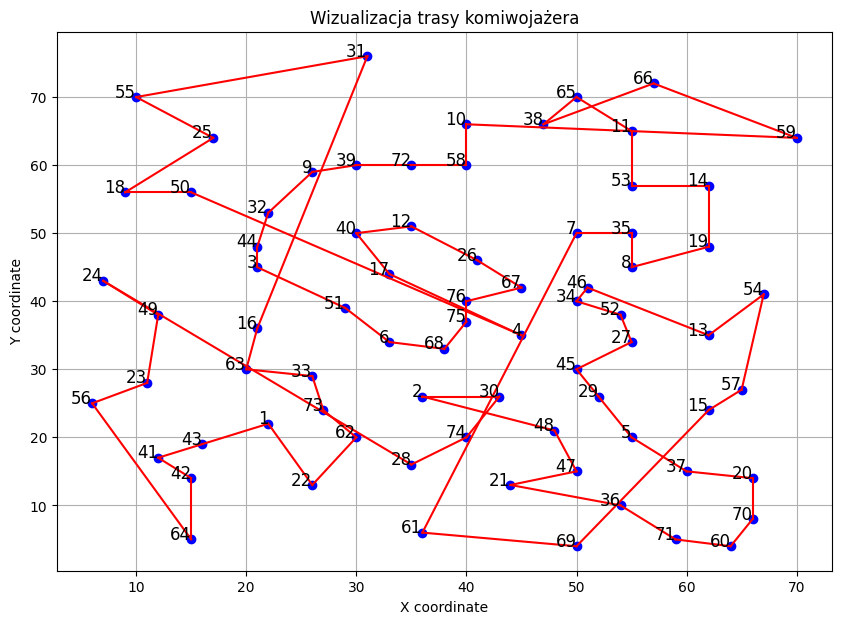

In [7]:
# Wizualizacja trasy
plot_tour(combined_tour, clusters)
